In [2]:
import starepandas
import geopandas
import cartopy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pystare
import os

# Loading a country

In [3]:
gdf = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))#, rows=slice(120, 130))
gdf = gdf[gdf.name =='United States of America']

level = 4

roi = starepandas.STAREDataFrame(gdf)
roi.set_sids(roi.make_sids(resolution=level), inplace=True)
roi.to_stare_singleres(inplace=True)
roi.set_trixels(roi.make_trixels(), inplace=True)

sids = roi.sids.iloc[0]

<AxesSubplot:>

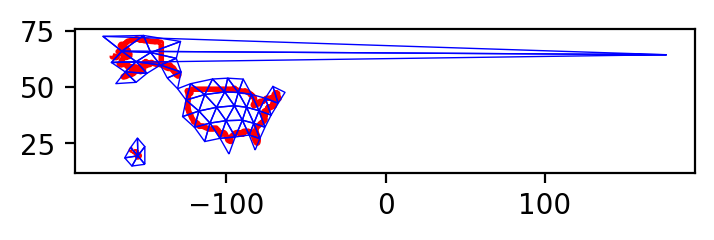

In [4]:
#proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
#proj = cartopy.crs.PlateCarree()
#opts = {'projection': proj}

#transf = cartopy.crs.Geodetic()

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
#ax.coastlines()
#ax.set_extent([-179, -50, 90, 10])

roi.plot(ax=ax, trixels=True,  lw=0.5, color='b')
roi.plot(ax=ax, trixels=False, boundary=False, lw=2, color='white', edgecolor='r')

In [7]:
sids = roi.hex()

# Reading iFVOs from the pods for the country

In [8]:
s1 = starepandas.read_pods(pod_root='pods/', sids=sids[0], pattern='S1', add_podname=True)

In [9]:
s1

,lat,lon,stare,timestamp,Tc1,Tc2,Tc3,pod
78069,15.362409,-155.307938,1171217587427035465,2021-01-10 02:36:38.000361,200.380005,132.059998,225.889999,pods//0x3768000000000004/S1.1C.F16.SSMIS.XCAL2...
78070,15.360896,-155.548721,1172203842330481737,2021-01-10 02:36:38.000361,198.740005,130.610001,224.639999,pods//0x3768000000000004/S1.1C.F16.SSMIS.XCAL2...
78071,15.352663,-155.789307,1172209004951796297,2021-01-10 02:36:38.000361,198.850006,129.380005,224.320007,pods//0x3768000000000004/S1.1C.F16.SSMIS.XCAL2...
78072,15.337708,-156.029526,1172224497826332393,2021-01-10 02:36:38.000361,197.630005,129.330002,224.139999,pods//0x3768000000000004/S1.1C.F16.SSMIS.XCAL2...
78073,15.316054,-156.269135,1172222286434984489,2021-01-10 02:36:38.000361,197.889999,129.589996,225.460007,pods//0x3768000000000004/S1.1C.F16.SSMIS.XCAL2...
...,...,...,...,...,...,...,...,...
126901,70.982292,-134.391068,3993498582206633065,2021-01-10 01:11:53.000634,249.759995,230.509995,248.820007,pods//0x3768000000000004/S1.1C.F16.SSMIS.XCAL2...
126990,70.875359,-134.139542,3993497837369314505,2021-01-10 01:11:55.000532,249.610001,229.600006,248.889999,pods//0x3768000000000004/S1.1C.F16.SSMIS.XCAL2...
126991,71.092476,-134.422516,3993217147219994697,2021-01-10 01:11:55.000532,248.860001,229.720001,248.220001,pods//0x3768000000000004/S1.1C.F16.SSMIS.XCAL2...
127080,70.985710,-134.169540,3993496954390460169,2021-01-10 01:11:57.000431,249.929993,229.470001,248.610001,pods//0x3768000000000004/S1.1C.F16.SSMIS.XCAL2...


In [10]:
s1.set_sids('stare', inplace=True)

## Plotting

In [11]:
s1.set_geometry(geopandas.points_from_xy(s1.lon, s1.lat, crs=4326), inplace=True)

In [12]:
s1.set_trixels(s1.make_trixels(n_workers=2), inplace=True)

<AxesSubplot:>

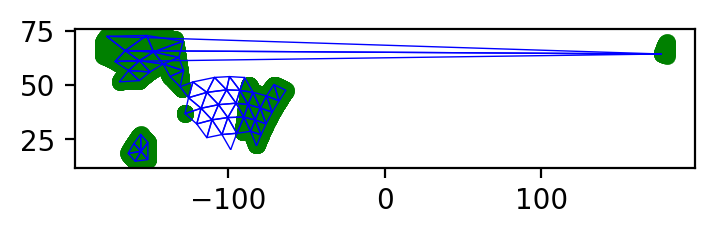

In [14]:
#proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
#proj = cartopy.crs.PlateCarree()
#opts = {'projection': proj}

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
#ax.coastlines()
#ax.set_extent([-179, -50, 90, 10])

s1.plot(ax=ax, trixels=False, lw=0.1, color='g')
roi.plot(ax=ax, trixels=True, lw=0.5, color='b')

NameError: name 'transf' is not defined

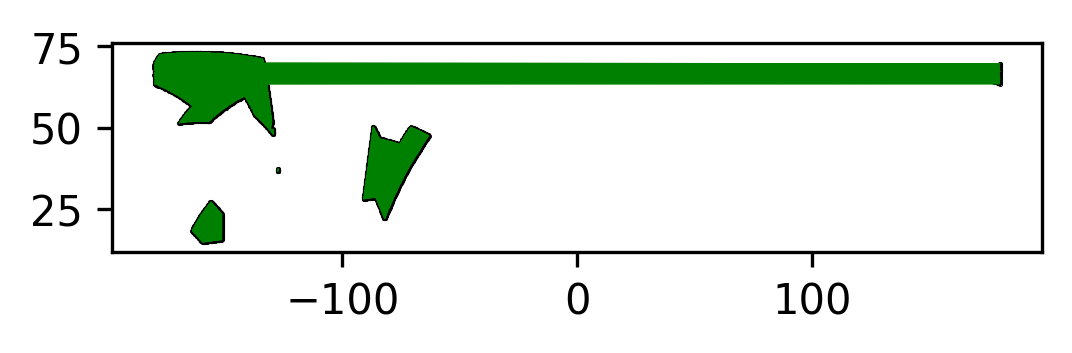

In [15]:
#proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
#proj = cartopy.crs.PlateCarree()
#opts = {'projection': proj}

fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
#ax.coastlines()
#ax.set_extent([-166, -149, 18, 23])

s1.plot(ax=ax, trixels=False,  markersize=0.2, color='k', marker='.')
s1.plot(ax=ax, trixels=True, lw=0.2, color='g')
roi.plot(ax=ax, trixels=True, transform=transf, lw=0.5, color='b')